### Image Processing for detecting Cracks in Concrete for (Site Engineers)

### Coded By/Mohammed AGooR

---------

### Import Used Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score

import tensorflow as tf

### Get Positive & Negative Directories

In [3]:
positive_dir = Path(r"D:\Artificial Intelligence\Eng Mohamed Agoor\Cracks_Detection-main\Dataset\Positive")
negative_dir = Path(r"D:\Artificial Intelligence\Eng Mohamed Agoor\Cracks_Detection-main\Dataset\Negative")

### Creating DataFrames

In [4]:
def generate_df(img_dir, label):
    file_paths = pd.Series(list(img_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=file_paths.index)
    df = pd.concat([file_paths, labels], axis=1)
    return df

In [5]:
positive_df = generate_df(positive_dir, 'POSITIVE')
negative_df = generate_df(negative_dir, 'NEGATIVE')

# concatenate both positive and negative df
all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
all_df

,Filepath,Label
0,D:\Artificial Intelligence\Eng Mohamed Agoor\C...,POSITIVE
1,D:\Artificial Intelligence\Eng Mohamed Agoor\C...,POSITIVE
2,D:\Artificial Intelligence\Eng Mohamed Agoor\C...,POSITIVE
3,D:\Artificial Intelligence\Eng Mohamed Agoor\C...,NEGATIVE
4,D:\Artificial Intelligence\Eng Mohamed Agoor\C...,POSITIVE
...,...,...
39995,D:\Artificial Intelligence\Eng Mohamed Agoor\C...,POSITIVE
39996,D:\Artificial Intelligence\Eng Mohamed Agoor\C...,NEGATIVE
39997,D:\Artificial Intelligence\Eng Mohamed Agoor\C...,POSITIVE
39998,D:\Artificial Intelligence\Eng Mohamed Agoor\C...,POSITIVE


### Split the DataSet

In [6]:
train_df, test_df = train_test_split(all_df.sample(6000, random_state=1), 
                train_size=0.7,
                shuffle=True,
                random_state=1)

### Loading Image Data

In [7]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                           validation_split=0.2)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [8]:
train_data = train_gen.flow_from_dataframe(train_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          subset='training')


val_data = train_gen.flow_from_dataframe(train_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          subset='validation')


test_data = test_gen.flow_from_dataframe(test_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=False,
                                          seed=42)

Found 3360 validated image filenames belonging to 2 classes.
Found 840 validated image filenames belonging to 2 classes.
Found 1800 validated image filenames belonging to 2 classes.


In [9]:
test_data

### Training DataSet

In [10]:
inputs = tf.keras.Input(shape=(120,120,3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [11]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [12]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [13]:
# print model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 32)               0     

In [14]:
history = model.fit(train_data, validation_data=val_data, epochs=100, 
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=3,
                                                              restore_best_weights=True)
                             ])

Epoch 1/100
105/105 [==============================] - 162s 2s/step - loss: 0.6708 - accuracy: 0.5860 - val_loss: 0.6676 - val_accuracy: 0.5048
Epoch 2/100
105/105 [==============================] - 77s 740ms/step - loss: 0.6026 - accuracy: 0.7045 - val_loss: 0.5677 - val_accuracy: 0.7738
Epoch 3/100
105/105 [==============================] - 77s 737ms/step - loss: 0.5144 - accuracy: 0.8089 - val_loss: 0.4798 - val_accuracy: 0.8333
Epoch 4/100
105/105 [==============================] - 82s 778ms/step - loss: 0.4279 - accuracy: 0.8830 - val_loss: 0.3809 - val_accuracy: 0.8917
Epoch 5/100
105/105 [==============================] - 76s 727ms/step - loss: 0.3527 - accuracy: 0.9134 - val_loss: 0.3096 - val_accuracy: 0.9321
Epoch 6/100
105/105 [==============================] - 73s 697ms/step - loss: 0.2910 - accuracy: 0.9283 - val_loss: 0.2459 - val_accuracy: 0.9440
Epoch 7/100
105/105 [==============================] - 76s 719ms/step - loss: 0.2489 - accuracy: 0.9366 - val_loss: 0.2116 - v

### Plotting

### Final Results

In [15]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    accuracy = results[1]
    
    print(f'Test Loss {loss:.5f}')
    print(f'Test Accuracy {accuracy * 100:.2f} %')
    
    
    # predicted y values
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
    y_certain = np.squeeze((model.predict(test_data)).astype(np.int))
    
    conf_matr = confusion_matrix(test_data.labels, y_pred)
    
    class_report = classification_report(test_data.labels, y_pred,
                                         target_names=['NEGATIVE', 'POSITIVE'])
    
    plt.figure(figsize=(6,6))
    
    sns.heatmap(conf_matr, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    
    plt.xticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=['NEGATIVE', 'POSITIVE'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('r2 Score : ', r2_score(test_data.labels, y_pred))
    print()
    print('Classification Report :\n......................\n', class_report)

Test Loss 0.07631
Test Accuracy 97.67 %
57/57 [==============================] - 14s 244ms/step


C:\Users\gamma\AppData\Local\Temp\ipykernel_5000\1954838651.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))


57/57 [==============================] - 12s 205ms/step


C:\Users\gamma\AppData\Local\Temp\ipykernel_5000\1954838651.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_certain = np.squeeze((model.predict(test_data)).astype(np.int))


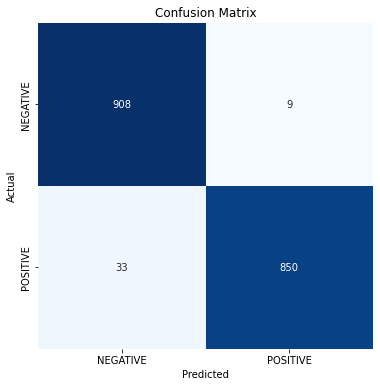

r2 Score :  0.9066333543696454

Classification Report :
......................
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.99      0.98       917
    POSITIVE       0.99      0.96      0.98       883

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800



In [16]:
evaluate_model(model, test_data)

In [33]:
y_scores_cnn = cross_val_predict(model, all_df[filepath], all_df[label], cv=5, n_jobs=-1, method='predict_proba')

NameError: name 'cross_val_predict' is not defined

In [ ]:

## Plotting the ROC for KNN & SGD
## Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, color='b', label='SGDClassifier')
plt.plot(fpr_knn, tpr_knn, linewidth=2, color='y', label='KNN')
plt.plot([1, 0], [1, 0], 'r--', label='Random Classifier')
plt.scatter(0, 0, color='g', s=50)
plt.scatter(1, 1, color='g', s=50)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR = Recall)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"C:\Users\gamma\Desktop\Dataset\check\new_check2.png", target_size = (120, 120))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_data.class_indices
if result[0][0] == 1:
  prediction = 'cracked'
else:
  prediction = 'not cracked'
print(prediction)

1/1 [==============================] - 0s 154ms/step
not cracked


### Testing New DataSet